# Chomsky normal form
## Converting trees in a treebank to CNF

## Tree representation

To have more control over tree transformation and additional features like loading, saving and visualizing them, trees are represented by their own class.

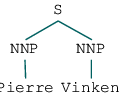

True

In [43]:
import json
import nltk.tree
import IPython.display

class Tree(object):
    
    def __init__(self, text: str=None):
        if text:
            self.load(text)
        else:
            self.structure = []
            
    def load(self, text: str):
        self.structure = json.loads(text)
        
    def save(self) -> str:
        return json.dumps(self.structure)
    
    def visualize(self):
        IPython.display.display(self.to_nltk_tree())
        
    def to_nltk_tree(self) -> nltk.tree.Tree:
        as_str = self.save()
        # Transform the string representation of the tree
        # to the string representation of an NLTK tree 
        as_str = as_str.replace("[", "(").replace("]", ")")
        as_str = as_str.replace('","', "_COMMA_").replace(",", "")
        as_str = as_str.replace("_COMMA_", ",").replace('"', "")
        return nltk.tree.Tree.fromstring(as_str)
    
    def __repr__(self) -> str:
        return self.save()
    
    def is_cnf(self, tree=None) -> bool:
        """
        Returns true, if the tree is in CNF.
        Adapted from starter code.
        """
        if tree is None:
            tree = self.structure
        n = len(tree)
        if n == 2:
            return isinstance(tree[1], str)
        elif n == 3:
            return self.is_cnf(tree[1]) and self.is_cnf(tree[2])
        else:
            return False
        
t = '["S", ["NNP", "Pierre"], ["NNP", "Vinken"]]'

tree = Tree(t)
tree.visualize()
tree.is_cnf()